
### Arboles de decisión

Analizaremos la calidad del vino tinto utilizando un modelo de árbol de decisión. 

Presentado por: Luis David Huertas Redondo, Grupo: 202016908_80



### 1. Análisis Exploratorio de Datos (EDA)

En esta sección, analizaremos el conjunto de datos para identificar relaciones entre variables, valores atípicos y tendencias. Esto incluye visualizaciones como histogramas, diagramas de caja y matrices de correlación.


In [103]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

# Ignorar solo los FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Cargar el conjunto de datos
df = pd.read_csv('Titanic-Dataset.csv')

# Mostrar las primeras filas del conjunto de datos
print("\nDatos originales:\n") 
print(df)

# Estadísticas resumidas
print("\nDescripción estadística:\n")
print(df.describe())

# Verificar valores faltantes
print("\\nValores faltantes:\\n")
print(df.isnull().sum())


Datos originales:

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                               

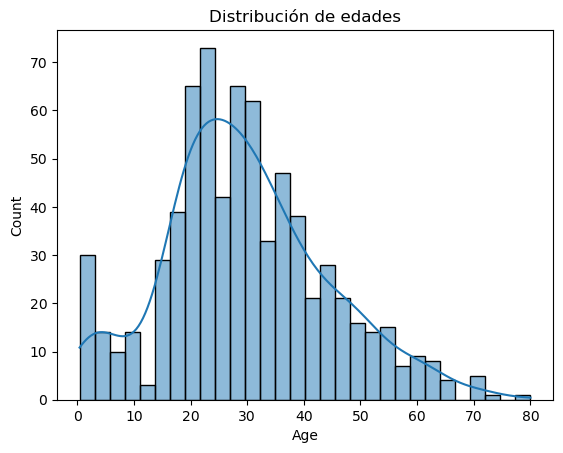

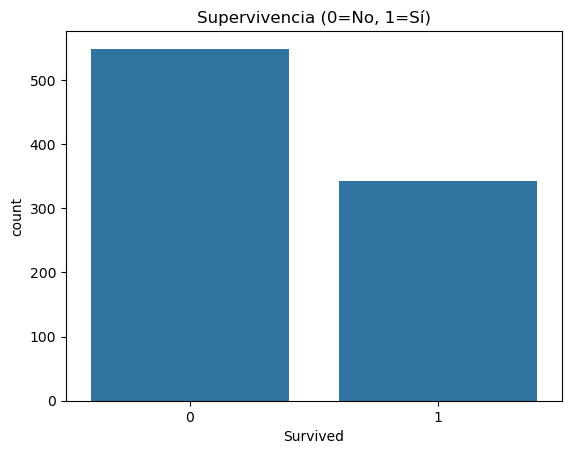

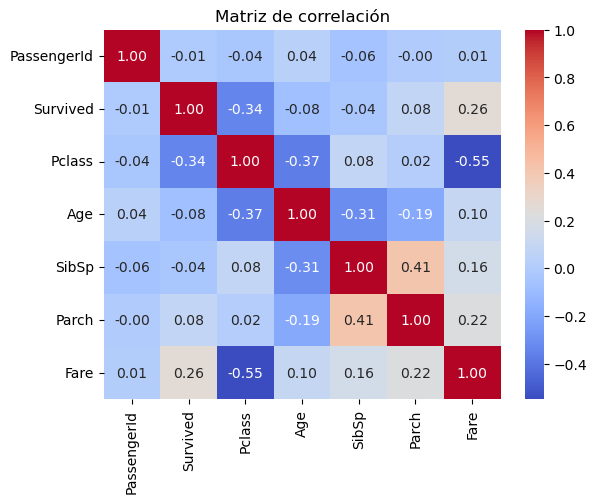

In [105]:
# Visualización de distribuciones
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribución de edades')
plt.show()

sns.countplot(x='Survived', data=df)
plt.title('Supervivencia (0=No, 1=Sí)')
plt.show()

# Matriz de correlación
numeric_features = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

### 2. Preprocesamiento de los Datos
En esta sección, limpiaremos los datos, imputaremos valores faltantes y realizaremos transformaciones necesarias.

In [108]:
# Imputación de valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Eliminar columnas no relevantes
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

print("Datos después del preprocesamiento:\\n")
print(df.head())

Datos después del preprocesamiento:\n
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


### 3. Selección de Características
Seleccionaremos las características más importantes para el modelo.

In [111]:
# Selección de características
X = df.drop('Survived', axis=1)
y = df['Survived']

selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)
scores = selector.scores_

# Mostrar puntajes de las características
for col, score in zip(X.columns, scores):
    print(f'{col}: {score:.2f}')

Pclass: 115.03
Age: 3.76
SibSp: 1.11
Parch: 5.96
Fare: 63.03
Sex_male: 372.41
Embarked_Q: 0.01
Embarked_S: 20.37


### 4. División del Conjunto de Datos
Dividiremos el dataset en conjuntos de entrenamiento y prueba.

In [114]:
# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 712
Tamaño del conjunto de prueba: 179


### 5. Entrenar modelo de árbol de decisión


In [117]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### 6. Evaluación del modelo



Métricas del modelo:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179

Exactitud: 0.80


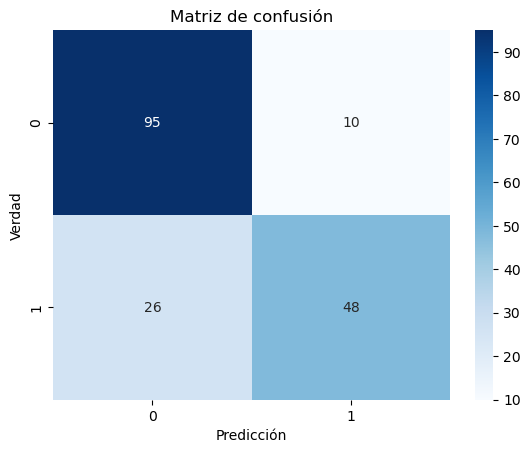

In [120]:
y_pred = clf.predict(X_test)

print("\nMétricas del modelo:")
print(classification_report(y_test, y_pred))
print(f"Exactitud: {accuracy_score(y_test, y_pred):.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

### 7. Grafica que permite visualizar resultados del modelo


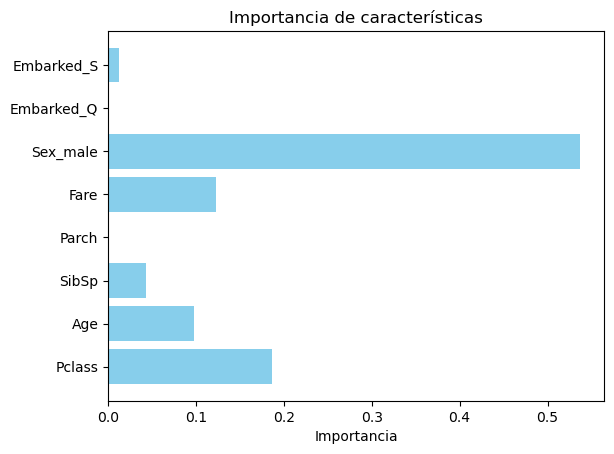

In [125]:
importances = clf.feature_importances_
features = X.columns

plt.barh(features, importances, color='skyblue')
plt.title('Importancia de características')
plt.xlabel('Importancia')
plt.show()

### 8. Interpretar, analizar y documentar resultados


In [132]:
# Evaluar sesgo y varianza
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print(f"Exactitud en entrenamiento: {train_score:.2f}")
print(f"Exactitud en prueba: {test_score:.2f}")

if abs(train_score - test_score) > 0.1:
    print("\nEl modelo podría estar sufriendo de sobreajuste (overfitting), ya que el desempeño en entrenamiento es significativamente mejor que en prueba.")
else:
    print("\nEl modelo parece generalizar bien, ya que el desempeño en entrenamiento y prueba es consistente.")

# Análisis de importancia de características
print("\nAnálisis de las características más importantes para el modelo:\n")
feature_importances = pd.DataFrame({
    'Característica': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(feature_importances)

print("\nLas características más importantes son aquellas con mayor puntuación en la gráfica de importancia. Esto puede guiar análisis futuros o mejorar la selección de características.")

# Documentación final
print("\nConclusiones:")
print("1. El modelo de árbol de decisión logró una precisión del {:.2f}, indicando su capacidad para predecir supervivientes en el Titanic.".format(accuracy_score(y_test, y_pred)))
print("2. La característica más relevante según el modelo fue '{}'. Esto indica su alta correlación con la variable objetivo.".format(features[importances.argmax()]))
print("3. Las métricas como F1-score y matriz de confusión muestran un balance razonable entre falsos positivos y negativos.")
print("4. Para futuras mejoras, se puede explorar ajustar hiperparámetros como la profundidad máxima, el criterio de partición, o probar modelos más complejos.")

Exactitud en entrenamiento: 0.85
Exactitud en prueba: 0.80

El modelo parece generalizar bien, ya que el desempeño en entrenamiento y prueba es consistente.

Análisis de las características más importantes para el modelo:

  Característica  Importancia
5       Sex_male     0.537435
0         Pclass     0.185909
4           Fare     0.123111
1            Age     0.097949
2          SibSp     0.042707
7     Embarked_S     0.012888
3          Parch     0.000000
6     Embarked_Q     0.000000

Las características más importantes son aquellas con mayor puntuación en la gráfica de importancia. Esto puede guiar análisis futuros o mejorar la selección de características.

Conclusiones:
1. El modelo de árbol de decisión logró una precisión del 0.80, indicando su capacidad para predecir supervivientes en el Titanic.
2. La característica más relevante según el modelo fue 'Sex_male'. Esto indica su alta correlación con la variable objetivo.
3. Las métricas como F1-score y matriz de confusión muestr